In [3]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.plotly as py 
from datetime import timedelta
import datetime
from fbprophet import Prophet

In [4]:
daily_df = pd.read_csv(os.path.join("Daily_air_data.csv"))

In [5]:
daily_df.head()

,Unnamed: 0,air_area_name,visit_date,visitors,air_genre_name,day_of_week,holiday_flg
0,0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Dining bar,Wednesday,0
1,1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Izakaya,Wednesday,0
2,2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Izakaya,Wednesday,0
3,3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Dining bar,Wednesday,0
4,4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Cafe/Sweets,Wednesday,0


In [6]:
daily_df = daily_df.drop(['Unnamed: 0'], axis=1)

In [7]:
daily_df.head()

,air_area_name,visit_date,visitors,air_genre_name,day_of_week,holiday_flg
0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Dining bar,Wednesday,0
1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Izakaya,Wednesday,0
2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Izakaya,Wednesday,0
3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Dining bar,Wednesday,0
4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Cafe/Sweets,Wednesday,0


In [8]:
better_daily_df = daily_df.drop(['air_genre_name'], axis=1)

In [9]:
better_daily_df.head()

,air_area_name,visit_date,visitors,day_of_week,holiday_flg
0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Wednesday,0
1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Wednesday,0
2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Wednesday,0
3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Wednesday,0
4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Wednesday,0


In [10]:
indexed_daily = better_daily_df.set_index(['air_area_name', 'visit_date']) 
indexed_daily.head()

visitors day_of_week  \
air_area_name                           visit_date                         
Tōkyō-to Minato-ku Shibakōen            2016-01-13        25   Wednesday   
Tōkyō-to Shinagawa-ku Higashigotanda    2016-01-13        21   Wednesday   
Tōkyō-to Minato-ku Shibakōen            2016-01-13        40   Wednesday   
                                        2016-01-13         5   Wednesday   
Shizuoka-ken Hamamatsu-shi Motoshirochō 2016-01-13        18   Wednesday   

                                                    holiday_flg  
air_area_name                           visit_date               
Tōkyō-to Minato-ku Shibakōen            2016-01-13            0  
Tōkyō-to Shinagawa-ku Higashigotanda    2016-01-13            0  
Tōkyō-to Minato-ku Shibakōen            2016-01-13            0  
                                        2016-01-13            0  
Shizuoka-ken Hamamatsu-shi Motoshirochō 2016-01-13            0

In [11]:
indexed_daily = indexed_daily.sort_values(['air_area_name', 'visit_date'])
indexed_daily.head()

visitors day_of_week  holiday_flg
air_area_name                  visit_date                                   
Fukuoka-ken Fukuoka-shi Daimyō 2016-01-01        21      Friday            1
                               2016-01-01        29      Friday            1
                               2016-01-01         3      Friday            1
                               2016-01-01        33      Friday            1
                               2016-01-02         8    Saturday            1

In [12]:
indexed_daily2 = indexed_daily.groupby(['air_area_name','visit_date'], as_index=False).agg({'visitors': 'sum'})

In [13]:
indexed_daily2 = daily_df.drop(['day_of_week', 'air_genre_name'], axis=1)
indexed_daily2 = indexed_daily2.sort_values(['air_area_name', 'visit_date'])
indexed_daily2.head()

,air_area_name,visit_date,visitors,holiday_flg
251928,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,21,1
251944,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,29,1
251948,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,3,1
251961,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,33,1
252063,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-02,8,1


In [14]:
indexed_daily2 = indexed_daily2.set_index(['air_area_name', 'visit_date', 'holiday_flg']) 
indexed_daily2.head()

visitors
air_area_name                  visit_date holiday_flg          
Fukuoka-ken Fukuoka-shi Daimyō 2016-01-01 1                  21
                                          1                  29
                                          1                   3
                                          1                  33
                               2016-01-02 1                   8

In [15]:
final = indexed_daily2.groupby(['air_area_name', 'visit_date', 'holiday_flg'], as_index=True).agg({"visitors": "sum"})
final = final.reset_index()
final.tail()

,air_area_name,visit_date,holiday_flg,visitors
44339,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-18,0,66
44340,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-19,0,54
44341,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-20,0,42
44342,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-21,0,96
44343,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-22,0,107


In [16]:
len(final["air_area_name"].unique())

103

In [17]:
air_ml_df = pd.read_csv(os.path.join("weekly_final_data.csv"))

In [18]:
ic_air_ml_df = air_ml_df.loc[air_ml_df["visitors"]!=0]
ic_air_ml_df.head(5)



,Unnamed: 0,Unnamed: 0.1,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,0,0,Tōkyō-to Minato-ku Shibakōen,Japanese food,2069,0,35.658068,139.751599
1,1,1,Tōkyō-to Minato-ku Shibakōen,Japanese food,2092,1,35.658068,139.751599
2,2,2,Tōkyō-to Minato-ku Shibakōen,Japanese food,2095,2,35.658068,139.751599
3,3,3,Tōkyō-to Minato-ku Shibakōen,Japanese food,1999,3,35.658068,139.751599
4,4,4,Tōkyō-to Minato-ku Shibakōen,Japanese food,1983,4,35.658068,139.751599


In [19]:
remove_area = list(ic_air_ml_df["air_area_name"].unique())
len(remove_area)

78

In [20]:
final_df = final[final.air_area_name.isin(remove_area)]

In [21]:
len(final_df["air_area_name"].unique())

78

In [22]:
area_array = list(final["air_area_name"].unique())
len(area_array)
first = area_array[2]

In [23]:
ds = []
y = []
ds_predict = []
y_predict = []

for index, row in final.iterrows():
    if row['air_area_name'] == first:
        ds.append(row['visit_date'])
        y.append(row['visitors'])
        
        
#             if row['visit_date'] < '2017-04-01':
#                 ds.append(row['visit_date'])
#                 y.append(row['visitors'])
#             elif row['visit_date'] >= '2017-04-01':
#                 ds_predict.append(row['visit_date'])
#                 y_predict.append(row['visitors'])
        

In [24]:
Fukuoka = ({
    "ds": ds,
    "y": y
})
df =pd.DataFrame.from_dict(Fukuoka)

In [25]:
Fukuoka_actual = ({
    "ds": ds_predict,
    "y": y_predict
})
actual =pd.DataFrame.from_dict(Fukuoka_actual)

In [42]:
df.tail()

,ds,y
282,2017-04-18,13
283,2017-04-19,21
284,2017-04-20,33
285,2017-04-21,12
286,2017-04-22,59


In [27]:
# actual.tail()

In [28]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\ejohn\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [29]:
future1 = m1.make_future_dataframe(periods=7)
forecast1 = m1.predict(future1)
forecast1.tail().T

,289,290,291,292,293
ds,2017-04-25 00:00:00,2017-04-26 00:00:00,2017-04-27 00:00:00,2017-04-28 00:00:00,2017-04-29 00:00:00
trend,36.7902,36.7938,36.7974,36.8011,36.8047
yhat_lower,4.5394,6.26889,13.4753,17.9829,20.0235
yhat_upper,35.7422,36.6779,43.055,47.6012,50.268
trend_lower,36.7902,36.7938,36.7974,36.801,36.8045
trend_upper,36.7902,36.7938,36.7975,36.8012,36.8049
additive_terms,-15.9382,-15.1999,-7.98139,-3.97451,-1.79507
additive_terms_lower,-15.9382,-15.1999,-7.98139,-3.97451,-1.79507
additive_terms_upper,-15.9382,-15.1999,-7.98139,-3.97451,-1.79507
daily,-9.7142,-9.7142,-9.7142,-9.7142,-9.7142


In [30]:
forecast =forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(22)

In [31]:
forecast

,ds,yhat,yhat_lower,yhat_upper
272,2017-04-08,34.933400,20.079434,50.392939
273,2017-04-09,25.841812,10.819169,41.135022
274,2017-04-10,24.515663,9.073458,39.603255
275,2017-04-11,20.801136,7.022594,35.978442
276,2017-04-12,21.543111,6.724234,36.537867
277,2017-04-13,28.765231,13.892129,44.138769
278,2017-04-14,32.775737,17.440353,47.951503
279,2017-04-15,34.958813,18.813830,49.783287
280,2017-04-16,25.867225,10.048670,41.489568
281,2017-04-17,24.541076,9.181043,40.022832


In [32]:
# actual.tail(22)

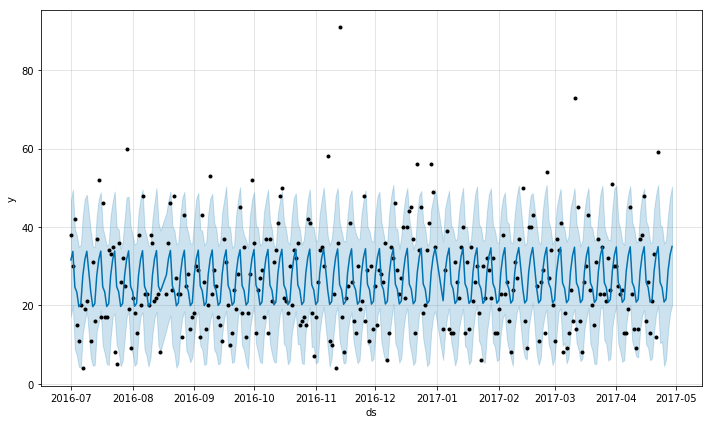

In [33]:
m1.plot(forecast1);


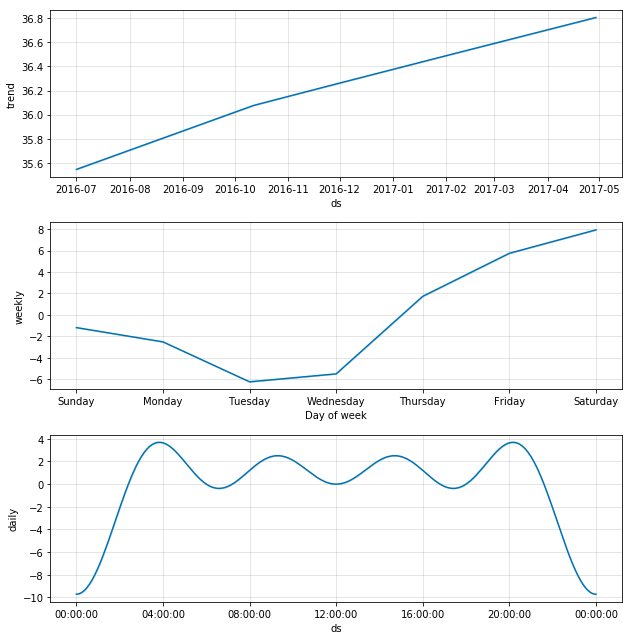

In [34]:
m1.plot_components(forecast1);

In [40]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m1, initial='450 days', period='1 days', horizon = '1 days')
df_cv

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

NameError: name 'df_cv' is not defined

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [44]:
r2_score(df_cv.y, df_cv.yhat)

NameError: name 'df_cv' is not defined

In [45]:
len(final_df["air_area_name"].unique())

78

In [46]:
final_df.head()

,air_area_name,visit_date,holiday_flg,visitors
0,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,1,86
1,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-02,1,219
2,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-03,1,278
3,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-04,0,264
4,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-05,0,302


In [47]:
count = final_df.groupby('air_area_name')['visit_date'].count()
# count.sort_values('visit_date').reset_index()
count.min()

406

In [48]:
df2 = final_df.rename(columns={'visit_date': 'ds','visitors': 'y', 'air_area_name': 'article'})
list_articles = df2.article.unique()
article_df = df2.loc[df2['article'] == list_articles[2]]
len(article_df)

478

In [60]:
article_df.to_csv('article.csv')

In [61]:
test = final_df['visit_date'].value_counts().sort_index()

In [62]:
test.count()

478

In [52]:
test.to_csv('test.csv', index = True)

In [58]:
def get_prediction(df):
#     prediction = {}
    df2 = df.rename(columns={'visit_date': 'ds','visitors': 'y', 'air_area_name': 'article'})
    list_articles = df2.article.unique()
    r2 = []
    for article in list_articles[3:4]:
        print(article)
        prediction = {}
        article_df = df2.loc[df2['article'] == article]
        print(len(article_df))
        days = (len(article_df) -8)
        print(days)
        # set the uncertainty interval to 95% (the Prophet default is 80%)
        my_model = Prophet(weekly_seasonality= True, daily_seasonality=True, seasonality_prior_scale=1.0)
        my_model.fit(article_df)
        future_dates = my_model.make_future_dataframe(periods=6)
        forecast = my_model.predict(future_dates)
#         prediction[article] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        prediction = forecast
        df = prediction
        df_output = pd.DataFrame(list(df.items()))
        df_output.to_csv(f'{article}.csv', index = False)
        df_cv = cross_validation(my_model, initial= f'{days} days', period='1 days', horizon = '1 days')
        r2.append(r2_score(df_cv.y, df_cv.yhat))
        
#     df_temp = prediction
#     print(df_temp)

#     df_output = pd.DataFrame(list(df_temp.items()))
#     df_output.to_csv('Tutorial.csv', index=True)
    print(r2)
    return prediction

In [59]:
get_prediction(final_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Fukuoka-ken Fukuoka-shi Shiobaru
477
469


C:\Users\ejohn\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Making 7 forecasts with cutoffs between 2017-04-15 00:00:00 and 2017-04-21 00:00:00


[0.5592689379101581]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-02,33.608287,20.314863,86.406059,33.608287,33.608287,20.932088,20.932088,20.932088,6.455572,6.455572,6.455572,14.476515,14.476515,14.476515,0.0,0.0,0.0,54.540375
1,2016-01-03,33.779309,-18.548112,45.147560,33.779309,33.779309,-20.053883,-20.053883,-20.053883,6.455572,6.455572,6.455572,-26.509455,-26.509455,-26.509455,0.0,0.0,0.0,13.725427
2,2016-01-04,33.950332,-0.717076,63.322338,33.950332,33.950332,-2.497373,-2.497373,-2.497373,6.455572,6.455572,6.455572,-8.952945,-8.952945,-8.952945,0.0,0.0,0.0,31.452959
3,2016-01-05,34.121354,12.480207,73.565315,34.121354,34.121354,8.331173,8.331173,8.331173,6.455572,6.455572,6.455572,1.875601,1.875601,1.875601,0.0,0.0,0.0,42.452527
4,2016-01-06,34.292376,3.604090,66.980910,34.292376,34.292376,1.546165,1.546165,1.546165,6.455572,6.455572,6.455572,-4.909408,-4.909408,-4.909408,0.0,0.0,0.0,35.838541
5,2016-01-07,34.463399,11.842309,75.806918,34.463399,34.463399,8.379339,8.379339,8.379339,6.455572,6.455572,6.455572,1.923766,1.923766,1.923766,0.0,0.0,0.0,42.842737
6,2016-01-08,34.634421,31.206633,95.195657,34.634421,34.634421,28.551498,28.551498,28.551498,6.455572,6.455572,6.455572,22.095926,22.095926,22.095926,0.0,0.0,0.0,63.185919
7,2016-01-09,34.805444,22.548133,87.150187,34.805444,34.805444,20.932088,20.932088,20.932088,6.455572,6.455572,6.455572,14.476515,14.476515,14.476515,0.0,0.0,0.0,55.737531
8,2016-01-10,34.976466,-14.610631,43.671981,34.976466,34.976466,-20.053883,-20.053883,-20.053883,6.455572,6.455572,6.455572,-26.509455,-26.509455,-26.509455,0.0,0.0,0.0,14.922583
9,2016-01-11,35.147488,0.600279,62.485845,35.147488,35.147488,-2.497373,-2.497373,-2.497373,6.455572,6.455572,6.455572,-8.952945,-8.952945,-8.952945,0.0,0.0,0.0,32.650116


NameError: name 'r2' is not defined